In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, ifft, fftshift
import scipy.io.wavfile as reader
import cmath
import time

## Fast Fourier Transform

#### Sampling

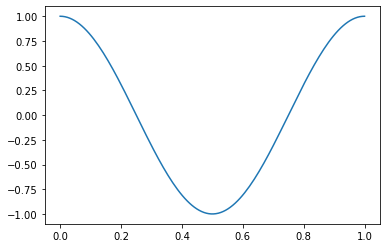

In [2]:
# x(t) sample of 128 points (equally spaced) between 0 and 1 seconds
n = np.linspace(0,1,128)
x_n = np.cos(2*np.pi*n)
plt.plot(n,x_n)

### N-point DFT

In [3]:
def DTFT(x,N):
    input_length = len(x)
    y = []
    w = np.linspace(0,2*np.pi,N)

    for k in range(N):  
        s = 0
        for n in range(input_length):
            s += x[n] * cmath.exp(-1j * w[k] * n)
        y.append(s)
    return y

In [4]:
N = len(x_n)
X_k = DTFT(x_n, N)
w = np.linspace(0,2*np.pi,N)

Text(0.5, 0, 'Frequency (radians)')

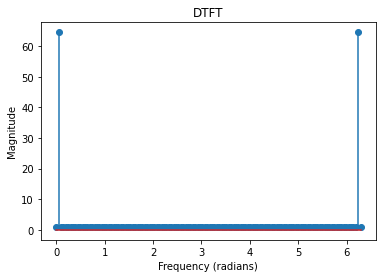

In [5]:
plot1 = plt.figure(1)
plt.stem(w, np.absolute(X_k))
plt.title('DTFT')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (radians)')

### 3. FFT (Radix-2)

#### (a) Separate even and odd indices

In [6]:
def separate(x, N):
    x1 = []
    x2 = []
    for i in range(int(N/2)):
        x1.append(x[2*i])
        x2.append(x[2*i+1])
    return x1, x2

#### (b) Recursive MyFFT

In [7]:
def FFT(x, N):
    if N < 2: return x
    else:
        x1, x2 = separate(x, N)
        X1 = FFT(x1, N/2)
        X2 = FFT(x2, N/2)
        phase_factor = np.exp(-2j * np.pi * np.arange(N) / N)
    return np.concatenate([X1 + phase_factor[:int(N/2)] * X2, X1 + phase_factor[int(N/2):] * X2])

If N < 2, the output is simply equal to the input, therefore we simply return x. 
In the else statement we first separate x into x1 and x2 (even and odd indices) by using the previously created function. Then, we call recursively MyFFT with input x1 and integer N/2 to get X1 and with input x2 and integer N/2 to get X2. 
We concatenate both X1 and X2 using the butterfly operation. For this step we require the phase factor: $W_{n}^{k} \ =e^{−j2\pi k/N}$

### 4. Compute FFT

Text(0.5, 0, 'Frequency (radians)')

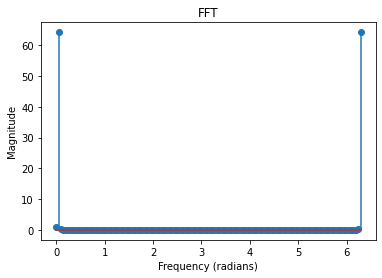

In [8]:
N = len(x_n)
x_fft = FFT(x_n, N)
w = np.linspace(0,2*np.pi,N)

plt.stem(w, np.absolute(x_fft))
plt.title('FFT')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (radians)')

#### Compare to DTFT

The FFT get a really good approximation of the Discrete Fourier Transform without consuming so many computational resources. By plotting both magnitude plots we can observe that both functions output the same shape for the frequency spectrum. 

### Audio Clip - DTFT vs FFT

<ipython-input-9-e747a8764ff2>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_clip, y_clip = reader.read('./clip.wav')


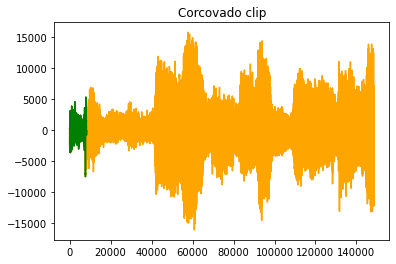

In [9]:
#Read audio file
fs_clip, y_clip = reader.read('./clip.wav')

#Take single channel
mono_clip = y_clip[:,0].astype(np.float64)
trimmed_clip = mono_clip[:8192]

plot1 = plt.figure(1)
plt.plot(mono_clip, color = "orange")
plt.plot(trimmed_clip, color = "green")

plt.title('Corcovado clip')
plt.show()

Time:
126.60297274589539


Text(0.5, 0, 'Frequency (radians)')

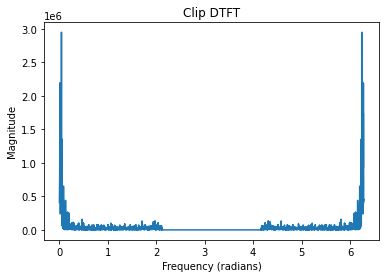

In [10]:
N = len(trimmed_clip)
w = np.linspace(0,2*np.pi,N)

start = time.time()
clip_fft = DTFT(trimmed_clip, N)
end = time.time()
print('Time:')
print(end - start)

plt.plot(w, np.absolute(clip_fft))
plt.title('Clip DTFT')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (radians)')

Time:
0.11031818389892578


Text(0.5, 0, 'Frequency (radians)')

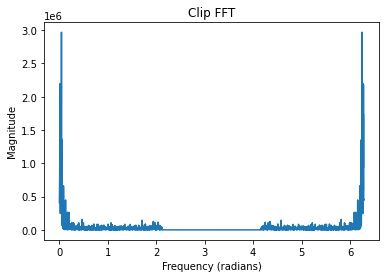

In [11]:
N = len(trimmed_clip)
w = np.linspace(0,2*np.pi,N)

start = time.time()
clip_fft = FFT(trimmed_clip, N)
end = time.time()
print('Time:')
print(end - start)

plt.plot(w, np.absolute(clip_fft))
plt.title('Clip FFT')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (radians)')